In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, Nadam, Adagrad
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("sensor-nodes.csv")
df.head()


,Node_ID,Timestamp,IP_Address,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,...,Number_of_Neighbors,Route_Request_Frequency,Route_Reply_Frequency,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,Is_Malicious
0,1,01-02-23 0:00,192.168.119.138,52.018229,2.727317,0.955687,130.967180,-52.059232,23.974265,82.982598,...,3,11.323044,11.458199,20.670539,14.385439,0.109146,26.376693,29.186341,76.811986,0
1,2,01-02-23 0:01,192.168.225.56,59.504648,1.435058,1.228460,82.634358,-57.754723,22.572052,66.734853,...,6,8.277362,8.832980,15.555122,14.316681,0.077136,34.963429,34.203177,112.495912,0
2,3,01-02-23 0:02,192.168.187.210,34.118204,1.320905,1.015245,61.649928,-52.399037,15.667076,74.593605,...,5,8.196374,8.330227,19.470748,11.792084,0.052993,48.934585,31.682662,117.526109,0
3,4,01-02-23 0:03,192.168.78.245,39.643055,1.988791,0.784562,69.704181,-53.727443,20.286962,76.710564,...,6,10.683766,6.525032,16.228955,8.895409,0.087810,47.045600,37.470027,123.058913,0
4,5,01-02-23 0:04,192.168.233.229,40.212679,1.005121,1.412193,123.445612,-49.696620,24.318538,84.477890,...,7,11.176823,10.617432,12.257423,10.168739,0.068823,33.394354,26.582970,71.696911,0


In [4]:
X = df.drop(columns=['Node_ID', 'Timestamp', 'IP_Address', 'Is_Malicious'])
y = df['Is_Malicious']


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)



X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42)



print("Shape of X_train:", X_train.shape)


Shape of X_train: (7000, 17)


In [7]:
sequence_length = X_train.shape[1]
num_features = 1

X_train_reshaped = X_train.reshape(-1, sequence_length, num_features)
X_val_reshaped = X_val.reshape(-1, sequence_length, num_features)
X_test_reshaped = X_test.reshape(-1, sequence_length, num_features)


In [8]:
model = Sequential()

model.add(Conv1D(filters=64, kernel_size=3, activation='tanh', input_shape=(
    sequence_length, num_features), kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))

model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=32, kernel_size=3, activation='tanh'))

model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

model.add(Dense(128, activation='tanh'))

model.add(Dropout(0.5))

# model.add(Dense(1, activation='sigmoid'))


In [9]:
adam_optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=adam_optimizer,
              loss='binary_crossentropy', metrics=['accuracy'])

adam_history = model.fit(X_train_reshaped, y_train, epochs=30,
                         batch_size=32, validation_data=(X_val_reshaped, y_val))


Epoch 1/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5483 - accuracy: 0.0586 - val_loss: 0.2235 - val_accuracy: 0.0013
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5050 - accuracy: 0.2513 - val_loss: 0.1878 - val_accuracy: 0.0000e+00
Epoch 3/30
219/219 [==============================] - 1s 3ms/step - loss: 0.4759 - accuracy: 0.3260 - val_loss: 0.1041 - val_accuracy: 0.0000e+00
Epoch 4/30
219/219 [==============================] - 1s 4ms/step - loss: 0.4396 - accuracy: 0.3467 - val_loss: 0.0862 - val_accuracy: 0.0000e+00
Epoch 5/30
219/219 [==============================] - 1s 3ms/step - loss: 0.4299 - accuracy: 0.4114 - val_loss: 0.0832 - val_accuracy: 0.0000e+00
Epoch 6/30
219/219 [==============================] - 1s 3ms/step - loss: 0.4321 - accuracy: 0.4390 - val_loss: 0.0802 - val_accuracy: 0.0000e+00
Epoch 7/30
219/219 [==============================] - 1s 4ms/step - loss: 0.4271 - accuracy: 0.4506 - val_loss: 0.0740 - val_acc

In [10]:
nadam_optimizer = Nadam(learning_rate=0.001)

model.compile(optimizer=nadam_optimizer,
              loss='binary_crossentropy', metrics=['accuracy'])

nadam_history = model.fit(X_train_reshaped, y_train, epochs=30,
                          batch_size=32, validation_data=(X_val_reshaped, y_val))


Epoch 1/30
219/219 [==============================] - 1s 3ms/step - loss: 0.4098 - accuracy: 0.4714 - val_loss: 0.0602 - val_accuracy: 0.0000e+00
Epoch 2/30
219/219 [==============================] - 1s 3ms/step - loss: 0.4127 - accuracy: 0.4770 - val_loss: 0.0527 - val_accuracy: 0.0000e+00
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.4621 - val_loss: 0.0429 - val_accuracy: 0.0000e+00
Epoch 4/30
219/219 [==============================] - 1s 3ms/step - loss: 0.3891 - accuracy: 0.4361 - val_loss: 0.0084 - val_accuracy: 0.0000e+00
Epoch 5/30
219/219 [==============================] - 1s 2ms/step - loss: 0.3888 - accuracy: 0.4529 - val_loss: 0.0113 - val_accuracy: 0.0000e+00
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.3834 - accuracy: 0.4627 - val_loss: 0.0100 - val_accuracy: 0.0000e+00
Epoch 7/30
219/219 [==============================] - 1s 2ms/step - loss: 0.3901 - accuracy: 0.4673 - val_loss: 0.0088 - val

In [11]:
adagrad_optimizer = Adagrad(learning_rate=0.001)

model.compile(optimizer=adagrad_optimizer,
              loss='binary_crossentropy', metrics=['accuracy'])

adagrad_history = model.fit(X_train_reshaped, y_train, epochs=30,
                            batch_size=32, validation_data=(X_val_reshaped, y_val))


Epoch 1/30
219/219 [==============================] - 1s 3ms/step - loss: 0.3866 - accuracy: 0.4831 - val_loss: 0.0068 - val_accuracy: 0.0000e+00
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.3871 - accuracy: 0.4720 - val_loss: 0.0067 - val_accuracy: 0.0000e+00
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.3890 - accuracy: 0.4726 - val_loss: 0.0067 - val_accuracy: 0.0000e+00
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.3864 - accuracy: 0.4749 - val_loss: 0.0067 - val_accuracy: 0.0000e+00
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.3889 - accuracy: 0.4740 - val_loss: 0.0066 - val_accuracy: 0.0000e+00
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.3877 - accuracy: 0.4706 - val_loss: 0.0065 - val_accuracy: 0.0000e+00
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.3855 - accuracy: 0.4689 - val_loss: 0.0065 - val

In [12]:
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


47/47 [==============================] - 0s 972us/step - loss: 0.0068 - accuracy: 0.0000e+00
Test Loss: 0.006805894430726767
Test Accuracy: 0.0


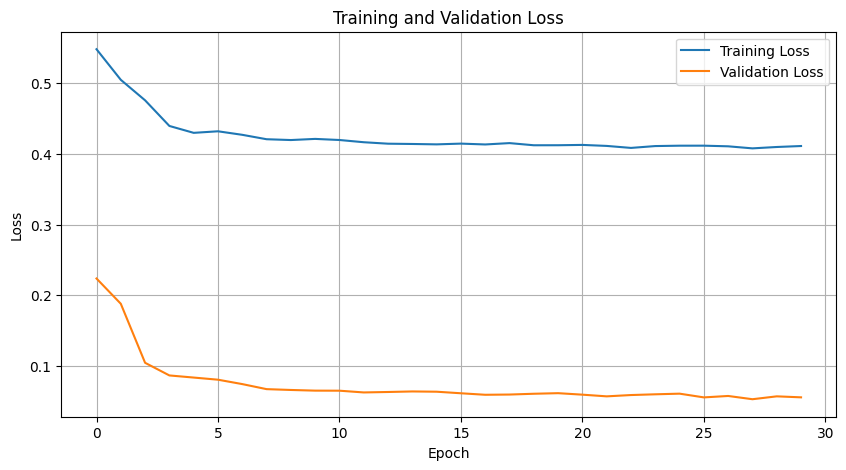

In [13]:
plt.figure(figsize=(10, 5))

plt.plot(adam_history.history['loss'], label='Training Loss')
plt.plot(adam_history.history['val_loss'], label='Validation Loss')

# plt.bar(np.arange(len(adam_history.history['loss'])), adam_history.history['loss'], label="Training Loss", color="blue", alpha=0.7)
# plt.bar(np.arange(len(adam_history.history['val_loss'])), adam_history.history['val_loss'], label="Validation Loss", color="lightblue", alpha=0.7)

plt.title("Training and Validation Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


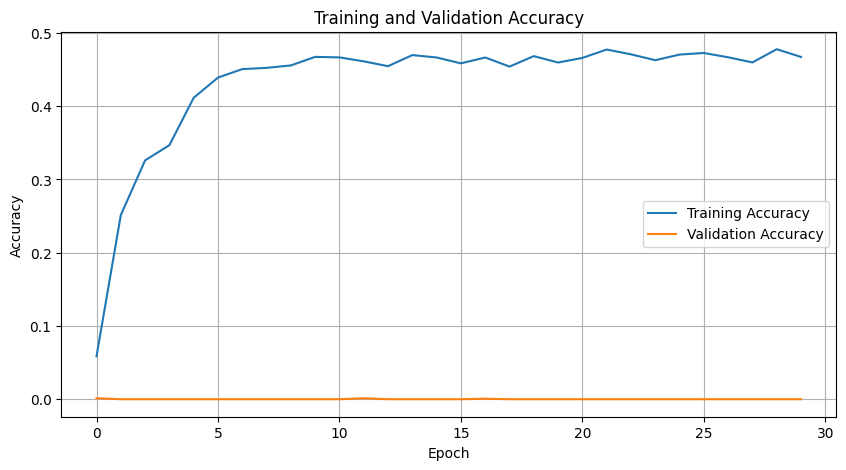

In [14]:
plt.figure(figsize=(10, 5))

plt.plot(adam_history.history['accuracy'], label='Training Accuracy')
plt.plot(adam_history.history['val_accuracy'], label='Validation Accuracy')

# plt.bar(np.arange(len(nadam_history.history['loss'])) + 0.2, nadam_history.history['loss'], label="Nadam Training Loss", color="red", alpha=0.7)
# plt.bar(np.arange(len(nadam_history.history['val_loss'])) + 0.2, nadam_history.history['val_loss'], label="Nadam Validation Loss", color="lightcoral", alpha=0.7)

plt.title("Training and Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


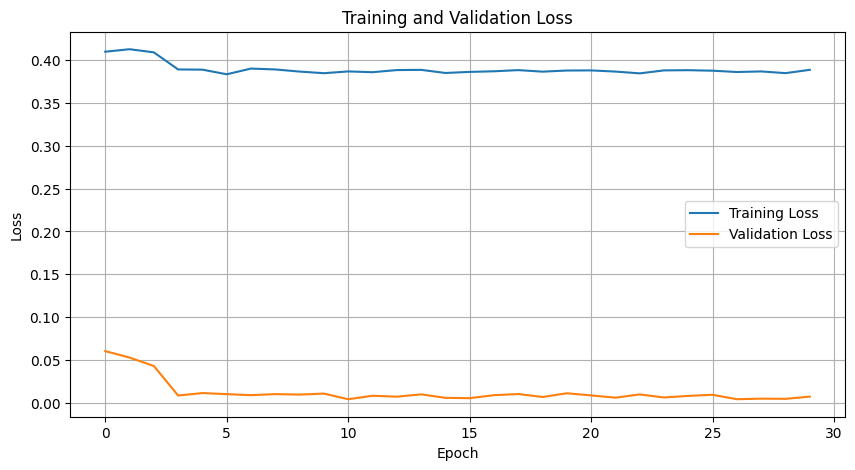

In [15]:
plt.figure(figsize=(10, 5))

plt.plot(nadam_history.history['loss'], label='Training Loss')
plt.plot(nadam_history.history['val_loss'], label='Validation Loss')

# plt.bar(np.arange(len(adagrad_history.history['loss'])) + 0.4, adagrad_history.history['loss'], label="Adagrad Training Loss", color="green", alpha=0.7)
# plt.bar(np.arange(len(adagrad_history.history['val_loss'])) + 0.4, adagrad_history.history['val_loss'], label="Adagrad Validation Loss", color="lightgreen", alpha=0.7)

plt.title("Training and Validation Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


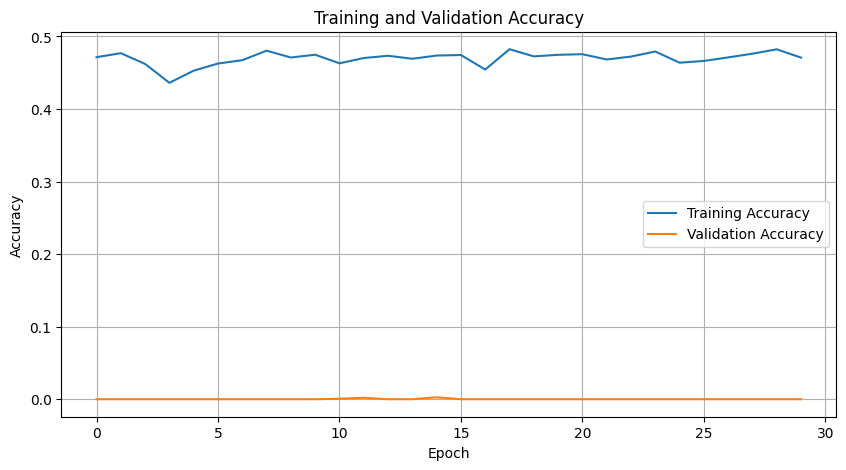

In [16]:
plt.figure(figsize=(10, 5))

plt.plot(nadam_history.history['accuracy'], label='Training Accuracy')
plt.plot(nadam_history.history['val_accuracy'], label='Validation Accuracy')

# plt.bar(np.arange(len(adam_history.history['accuracy'])), nadam_history.history['accuracy'], label="Training Accuracy", color="blue", alpha=0.7)
# plt.bar(np.arange(len(adam_history.history['val_accuracy'])), nadam_history.history['val_accuracy'], label="Validation Accuracy", color="lightblue", alpha=0.7)

plt.title("Training and Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


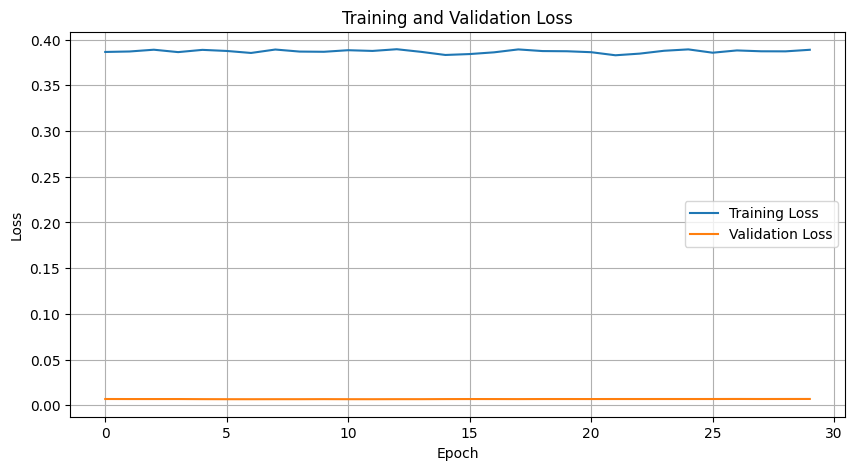

In [17]:
plt.figure(figsize=(10, 5))

plt.plot(adagrad_history.history['loss'], label='Training Loss')
plt.plot(adagrad_history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


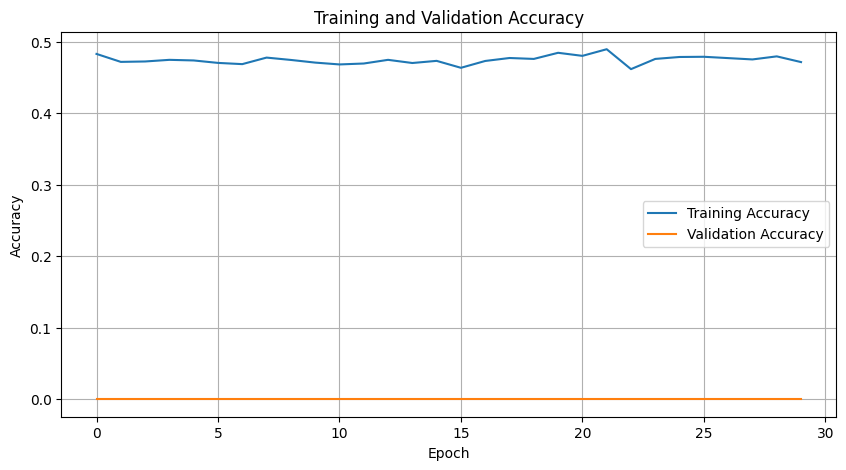

In [18]:
plt.figure(figsize=(10, 5))

plt.plot(adagrad_history.history['accuracy'], label='Training Accuracy')
plt.plot(adagrad_history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


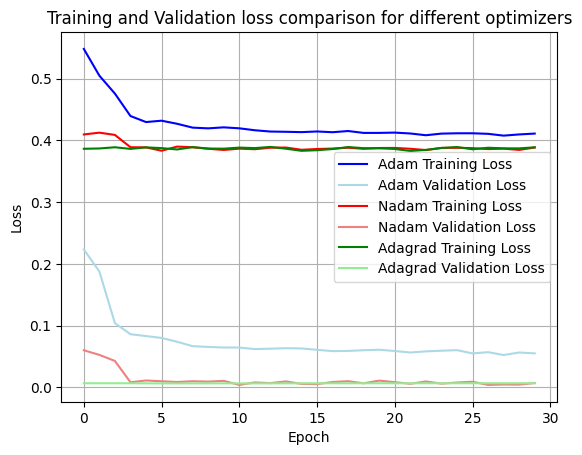

In [19]:
plt.plot(adam_history.history['loss'],
         label="Adam Training Loss", color="blue")


plt.plot(adam_history.history['val_loss'],
         label="Adam Validation Loss", color="lightblue")



plt.plot(nadam_history.history['loss'],
         label="Nadam Training Loss", color="red")


plt.plot(nadam_history.history['val_loss'],
         label="Nadam Validation Loss", color="lightcoral")



plt.plot(adagrad_history.history['loss'],
         label="Adagrad Training Loss", color="green")


plt.plot(adagrad_history.history['val_loss'],
         label="Adagrad Validation Loss", color="lightgreen")



plt.title("Training and Validation loss comparison for different optimizers")


plt.xlabel("Epoch")


plt.ylabel("Loss")
plt.legend()



plt.grid(True)


plt.show()


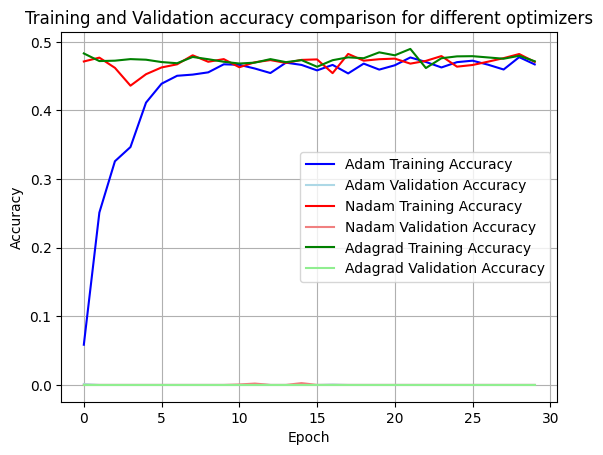

In [20]:
plt.plot(adam_history.history['accuracy'],
         label="Adam Training Accuracy", color="blue")


plt.plot(adam_history.history['val_accuracy'],
         label="Adam Validation Accuracy", color="lightblue")



plt.plot(nadam_history.history['accuracy'],
         label="Nadam Training Accuracy", color="red")


plt.plot(nadam_history.history['val_accuracy'],
         label="Nadam Validation Accuracy", color="lightcoral")



plt.plot(adagrad_history.history['accuracy'],
         label="Adagrad Training Accuracy", color="green")


plt.plot(adagrad_history.history['val_accuracy'],
         label="Adagrad Validation Accuracy", color="lightgreen")



plt.title("Training and Validation accuracy comparison for different optimizers")


plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()



plt.grid(True)


plt.show()
